In [ ]:
import numpy as np # lineer cebir
import pandas as pd # data işleme,cv dosyaları i/o
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import regularizers
from keras.callbacks import EarlyStopping

In [ ]:
#mnist data seti keras içerisinde otomatik olarak gelen ds'lerden biri.
from keras.datasets import mnist

#veri setini otomatik bir fonksiyonla ayarlamışlar.
(X_train,y_train),(X_test,y_test)=mnist.load_data()

#Verinin içerisindeki dağılıma bakalım.Unique ve Countu hesaplayalım.

u,c=np.unique(y_train,return_counts=True)

#Eğitim etiketlerine bakalım.Totalde kaç veri var bakmak istiyoruz.
#Hangi veriden kaç tane var onu görmeye çalışıyoruz.
#Train içerisinde 0-9 arasında sayılardan kaçar tane var bulmaya çalışıyoruz.
print("Train labels:",dict(zip(u,c)))

u,c=np.unique(y_test,return_counts=True)
#Aynı şeyi test içinde yapalım.
print("Test labels:",dict(zip(u,c)))

#Test verimiz (10000, 28, 28) 10000 tane 28x28'lik görüntü
X_test.shape

#Train yani eğitim verimiz (60000, 28, 28).
X_train.shape

#60000 tane eğitim verimiz, 10000 tanede test verimiz var.

#X_train[0] ile ilk veriyi görebiliyoruz.

Train labels: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


(60000, 28, 28)

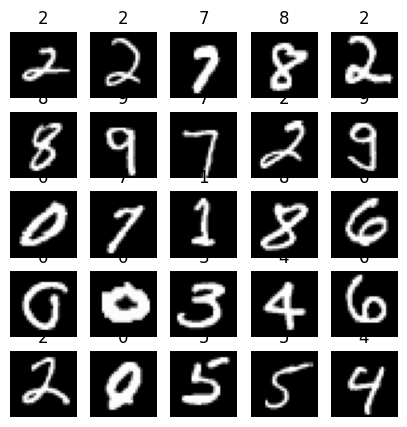

In [ ]:
#Elimizdeki verileri bazı indexlerle görüntüleme yapalım.Veriyi keşfetmeye çalışıyoruz.
indexes=np.random.randint(0,X_train.shape[0],size=25)
#Eğitim verisi içerisinden rastgele indexler aldık.

images=X_train[indexes]
labels=y_train[indexes]
#image ve labelleri aldık bunları gösterelim.
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
  #(5,5)'ik göstereceğiz. i+1 aralıklarla olacak.
  plt.subplot(5,5,i+1)
  image=images[i]
  plt.title(labels[i])
  plt.imshow(image,cmap='gray')
  plt.axis("off")
plt.show()

#Yaptığımız şey, elimize ne gibi veriler geliyo onlara bakmak.
#Her çalıştırdığımızda rastgele sayıları şekil olarak getirdi.


In [ ]:
#Yapay sinir ağını eğitebilmemiz için bu görüntüleri bazı işlemlerden geçirmeliyiz.
#İlk olarak one hot encoding yapacağız.Yani bunların etiketlerini değiştireceğiz.

print(y_test[0]) # dediğimizde 7 değerini verdi.İlk eleman 7'ymiş.
#Bunu yapay sinir ağına veremeyiz.Yapay sinir ağında 10 farklı çıktı olacak.
#Bunu 1-0 şeklinde ifade ettirmemiz lazım.
#Bu veri içinde toplam etiket sayısını bulalım.
#np.unique ile benzersiz etiket sayısını bulabiliriz.
#y_train içindeki benzersiz etiket sayısını bulalım.
num_labels=len(np.unique(y_train))
num_labels

#10 tane veri etiketi varmış.

#one hot encoding. 7 çıktısı aldık üstte.Bunu çevireceğiz.
#Çıktımız 10 tane nöron.Bazı nöronlar 0 bazıları 1 olacak şekilde ayarlayacağız.
#Çünkü direk 7 çıktısı alamıyoruz. 7'yi ikilik sistemde yapay sinir ağının çıktısı
#şeklinde ifade edeceğiz.Böylelikle model bir tahmin verdiğinde hangisi yüksekse
#o 1 olacak diğerleri direk 0 olacak. Bizde çevirirken hangi indexte, şuradaki indexte
#indexte 7, o zaman tahmini 7'dir diyeceğiz.

#7--> 0 0 0 0 0 0 1 0 0


#Bunu çevirmenin hazır fonksiyonları var.

y_train=tf.keras.utils.to_categorical(y_train)
#Aynısını test için yapıcaz.
y_test=tf.keras.utils.to_categorical(y_test)

#Artık testin 0. elemanını görmek istediğimizde [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]
y_test[0]

#Artık yapay sinir ağını categoric hale getirdik.Çıktıyı ayarladık.

7


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
#Önce girdinin hesabını yapacağız.

#Her bir görüntünün boyutu lazım. X_train shape (60000,28,28) idi.
img_size=X_train.shape[1]

#input size yani yapay sinir ağının girdisini belirliyoruz.
input_size=img_size*img_size

#Girdiyi flat olarak vermemiz lazım.Flat hale getirdiğimizde 28x28 yaptığımız zaman
#input size'ımızı belirlemiş oluruz. input_size yani girdi boyutumuz 784 oldu.

#Bunu ayarladık ancak görüntü içerisinde flat hale getirmedik.Veri içerisinde
#herhangi bir uygulama yapmadık.

#Hepsini flat hale getirmek istiyoruz.
#reshape fonksiyonu Parametreleri sırasıyla
#X_train'i al, [-1] = vektörel hale getir,input size'a göre vektörel hale getir.
X_train = np.reshape(X_train,[-1,input_size])

#X_train.shape (60000,28,28) idi. Şimdi bakalım.
#(60000, 784) oldu.Yani 60000 tane 784'lük vektörümüz var.Artık flat halde.
X_train.shape

#Bunları test içinde yapalım.
X_test = np.reshape(X_test,[-1,input_size])

#Ölçekleme yapay sinir ağlarında önemli.Yapay sinir ağlarında büyük sayılarla
#çalışmak istemeyiz.Küçük sayılarla çalışmak tercih edilir.
#Çünkü hesaplama maliyeti küçük olur

#Ölçekleme yapacağız.

#Bunların görüntü olduğunu bildiğimiz için her birini 255'e bölüp 0-1 arasına ölçekleyebiliriz.

#X_train içerisindeki her bir pixeli 255'e bölüyoruz ve 0-1 arasına ölçekliyoruz.
X_train=X_train.astype('float32')/255

#Aynı şeyi X_test içinde yapıyoruz.
X_test=X_test.astype('float32')/255

#X_test[0]

#Ölçekleme yapmadan önce 0-255 arası sayılar var.Ölçekleme yapmadan
#X_test[0] ile bakınca görüyoruz. Yaptıktan sonra 0-1 arası sayılar geldi.

In [ ]:
#Girdileri ayarladık. Çıktıları one hot encode ettik.Her şey hazır.Artık modelimizi eğitebiliriz.

#Basit bir model tasarlayacağız.

model=Sequential()

#Katman ekleyelim.İlk dense katmanına input dimention vermemiz lazım.
#Yani bu dense katmanına girdi ne olacak.Bunu ayarlamıştık input_size.
model.add(Dense(512,input_dim=input_size,activation='relu',kernel_regularizer=regularizers.L2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu',kernel_regularizer=regularizers.L2(0.001)))
model.add(Dropout(0.3))
#Son katmanımız çıktı katmanımız.number of labels'ı yukarıda hesaplamıştık.
#Son katman aktivasyonu
model.add(Dense(num_labels,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Early Stop

#Eğitim esnasında kullanabileceğimiz bazı denetim mekanizmaları var.
#Bunlara callback deniliyor.Early stopda bunlardan bir tanesi.

#Earlystopping yaparken neyi izleyeceğimiz => monitör.
#Validation loss kaç epok boyunca gelişmezse eğitimi durdurayım diyor.
#Eğer 3 epok boyunca bir öncekinden daha düşük hale gelmezse bunu durdur.

callback=[EarlyStopping(monitor="val_loss",patience=3)]

#Bunu bir altta model.fit'te callbacklere ekleyeceğiz.

In [ ]:
#Artık modelimizi derleyip eğitime başlamalıyız.
#Veri kategorik olduğu için loss fonksiyonumuz categorical_crossentropy.
#Optimizer adam olsun. Eğitim esnasında neyi izleceği, onada accuracy dedik.

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

#Modeli derledik işimize başlayalım.Batch_size= 128'lik batchlar halinde versin.
#Validation split ise kendisi otomatik ayırsın.
history=model.fit(X_train,y_train,epochs=25,batch_size=128,validation_split=0.2,callbacks=callback)

#Validation accuracy 0.97 almış baya iyi bir sonuç.

#History'i çizdirelim.

Epoch 1/25
375/375 [==============================] - 10s 23ms/step - loss: 0.8354 - accuracy: 0.9092 - val_loss: 0.4483 - val_accuracy: 0.9581
Epoch 2/25
375/375 [==============================] - 13s 34ms/step - loss: 0.3828 - accuracy: 0.9545 - val_loss: 0.3032 - val_accuracy: 0.9644
Epoch 3/25
375/375 [==============================] - 15s 41ms/step - loss: 0.2883 - accuracy: 0.9622 - val_loss: 0.2666 - val_accuracy: 0.9642
Epoch 4/25
375/375 [==============================] - 17s 46ms/step - loss: 0.2566 - accuracy: 0.9654 - val_loss: 0.2413 - val_accuracy: 0.9668
Epoch 5/25
375/375 [==============================] - 14s 38ms/step - loss: 0.2471 - accuracy: 0.9658 - val_loss: 0.2440 - val_accuracy: 0.9680
Epoch 6/25
375/375 [==============================] - 11s 29ms/step - loss: 0.2352 - accuracy: 0.9682 - val_loss: 0.2304 - val_accuracy: 0.9700
Epoch 7/25
375/375 [==============================] - 8s 22ms/step - loss: 0.2306 - accuracy: 0.9682 - val_loss: 0.2193 - val_accuracy: 

In [ ]:
#Değerlendirme metriklerini yazalım.

scores=model.evaluate(X_train,y_train)
print("Training Accuracy:",scores[1]*100)

scores=model.evaluate(X_test,y_test)
print("Test Accuracy:",scores[1]*100)


1875/1875 [==============================] - 9s 5ms/step - loss: 0.1788 - accuracy: 0.9772
Training Accuracy: 97.72166609764099
313/313 [==============================] - 1s 4ms/step - loss: 0.2035 - accuracy: 0.9690
Test Accuracy: 96.8999981880188


In [ ]:
#Birde tahminleri almamız lazım.Fonksiyon x_testleri istiyodu.

#Bu bize tahminler,olasılıklar verecek.
pred=model.predict(X_test)

#Bu olasılıkları 1,2,3,4,5 gibi sayısal değerlere dönüştürmemiz lazım.
#Prediction içindeki değerlerin büyüklerinin indexlerini alsın.
#pred=np.argmax(pred,axis=1)

#Şöyle düşünelim.Olasılıkları içeren 10'lu çıktımız var.(0.1,0.5,0.23) gibi.
#Bu olasıkların büyük olanının indexini tahmin olarak alıyoruz.

#Modeli büyütmeyi gördük.





#Artık dersin son kısmı
#pred[0]

#pred[0] dediğimizde olasılıklar geldi.Bunları elimizdeki mevcut y_testlerle
#karşılaştıramayız.O yüzden bunları sayısal şeylere dönüştürmemiz lazım.
#listedeki en büyük olasılığın bulunduğu indexi kategorik olarak atacağız.

y_pred=np.argmax(pred,axis=1)
y_pred[0]

#Şimdi direk olarak 7'yi veriyor.Artık y testlerle bunları karşılaştırabiliriz.

#Sonucumuzda early stop çalışmadı.Yani validation loss her epokta düşmeye devam etti.


313/313 [==============================] - 2s 6ms/step


7

In [ ]:
#Classification Report

from sklearn.metrics import classification_report

#y_test = Olması gereken çıktılar.
print(classification_report(y_test,y_pred))

y_pred
#y_test = 7 iken, y_pred değerimiz one hot encoding halinde.
#Bunu eski haline getirebiliriz.

#Burada her bir sınıf bazında precisionu recallu belirlendi.
#En çok karıştırılan en kötü recalla sahip olan 8.

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.98      0.96      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.89      0.99      0.94       892
           6       0.98      0.97      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.93      0.95       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



array([7, 2, 1, ..., 4, 5, 6])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


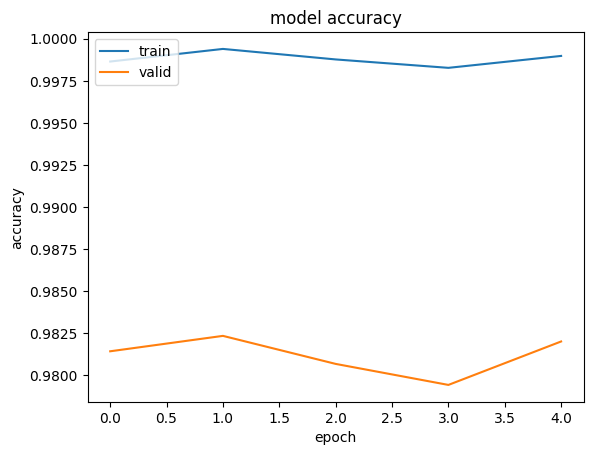

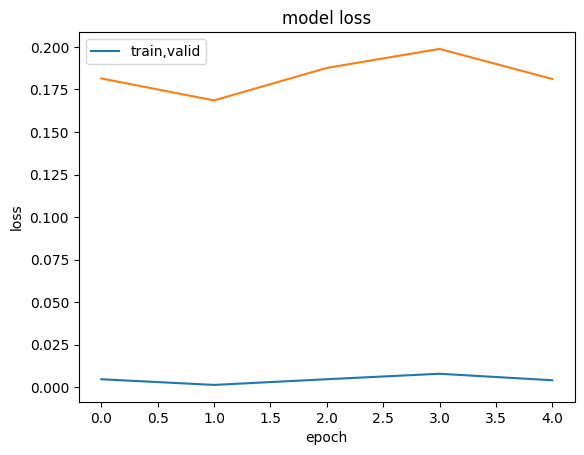

In [ ]:
import matplotlib.pyplot as plt

print(history.history.keys())

#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()

#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train,valid'],loc='upper left')
plt.show()

#Belirli bir yerden sonra loss düşmemiş.
#Buda bize modelimizin biraz ezberlediğini gösterir.Bunu engellemeliyiz.

#Bunu engellemek için modelin karmaşıklığını artıralım.Daha büyük bir model tasarlayalım.
#Denselerini 64,64,10 şeklinde girdiğimiz veriyi 512-512-10 yapalım.


In [ ]:
#Dropout da yapalım.Başlardaki satıra model.add diyip dropout ekleyebiliyoruz.
#512'lik 2 katman arasına ekledik.Bu sayede iki katman arasındaki eğitim esnasında
#512'lik nöronların %20'sini eğitime katmaz.


#Regularization yapabiliriz.Bunu modele ekleyelim.
#model.add(Dense(512,input_dim=input_size,activation='relu',kernel_regularizer=regularizers.L2(0.001)))
#L1 ve L2 fonksiyonları vardı.L2'yi seçtik.
#İçine lambdayı istiyor parametre olarakta 0.001'i seçtik.
#Lambdayı ne kadar büyük yaparsak çizdiğimiz çizgi o kadar düz hale gelir.
#2 tane dense katmanına ekledik.


#Modelin early stop etmesini yapalım.
